In [1]:
pip install pandas numpy matplotlib seaborn folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 1.7 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: /opt/homebrew/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


🔍 Dataset Overview:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0   

📊 Columns: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Pota

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


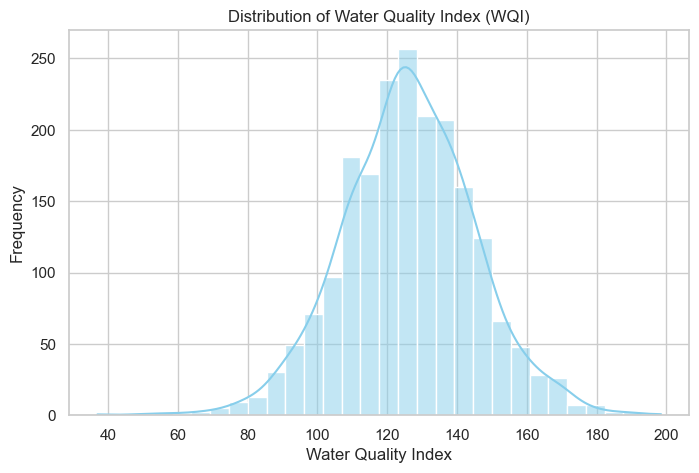

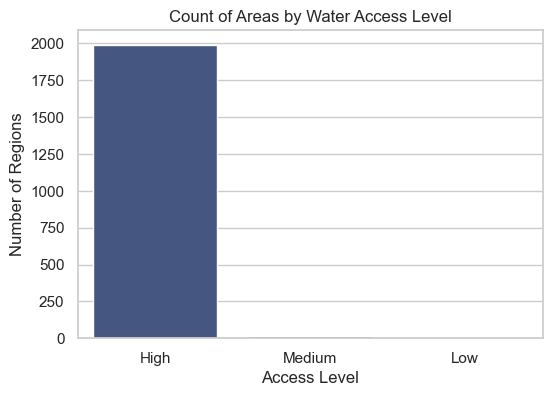

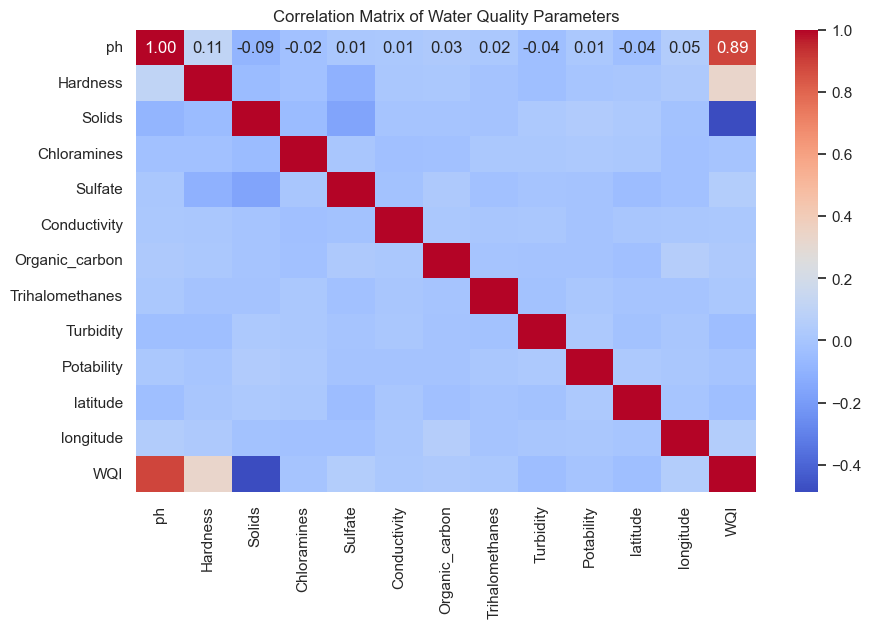

🗺️ Interactive water-quality map saved as 'rural_water_quality_map.html'


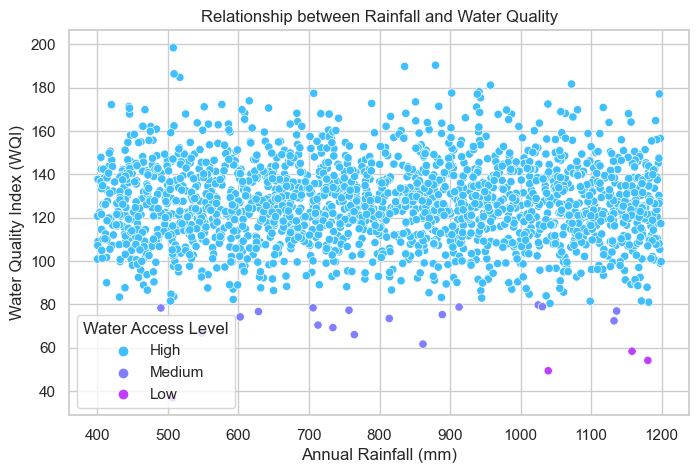


📊 INSIGHTS SUMMARY
High Access Regions: 1990
Medium Access Regions: 17
Low Access Regions: 4

Average WQI: 126.16

✅ Project Completed: Mapping Access to Clean Water in Rural Areas


In [5]:
# ============================================
# Mapping Access to Clean Water in Rural Areas
# ============================================
# Author: Nowshika Mirza R
# Course: Big Data Analytics
# SDG 6: Clean Water and Sanitation
# ============================================

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# ============================================
# STEP 2: Load Dataset
# ============================================
# Download Kaggle dataset: "Global Water Potability" or "Rural Water Quality"
# Example: https://www.kaggle.com/datasets/adityakadiwal/water-potability
# Rename the file as 'global_water_quality.csv' before running this notebook

df = pd.read_csv("water_potability.csv")

# Quick overview
print("🔍 Dataset Overview:")
print(df.head(), "\n")
print("📊 Columns:", df.columns.tolist())

# ============================================
# STEP 3: Data Cleaning
# ============================================
# Handle missing values
df = df.dropna()

# If latitude/longitude not present, simulate locations for visualization
if 'latitude' not in df.columns:
    np.random.seed(42)
    df['latitude'] = np.random.uniform(8, 37, len(df))
    df['longitude'] = np.random.uniform(68, 97, len(df))

# Add Water Quality Index (WQI)
df['WQI'] = round((df['ph']*10 + (1 - df['Solids']/df['Solids'].max())*50 + df['Hardness']/df['Hardness'].max()*40), 2)

# Add classification based on WQI
def classify_quality(wqi):
    if wqi >= 80:
        return 'High'
    elif wqi >= 60:
        return 'Medium'
    else:
        return 'Low'

df['Water Access Level'] = df['WQI'].apply(classify_quality)

print("\n✅ Data cleaned and new features added successfully!")

# ============================================
# STEP 4: Statistical Summary
# ============================================
print("\n📈 Summary Statistics:")
print(df.describe())

# ============================================
# STEP 5: Visualization 1 - Water Quality Distribution
# ============================================
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['WQI'], bins=30, color='skyblue', kde=True)
plt.title("Distribution of Water Quality Index (WQI)")
plt.xlabel("Water Quality Index")
plt.ylabel("Frequency")
plt.show()

# ============================================
# STEP 6: Visualization 2 - Water Access Level Counts
# ============================================
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Water Access Level', palette='viridis')
plt.title("Count of Areas by Water Access Level")
plt.xlabel("Access Level")
plt.ylabel("Number of Regions")
plt.show()

# ============================================
# STEP 7: Visualization 3 - Correlation Heatmap
# ============================================
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Water Quality Parameters")
plt.show()

# ============================================
# STEP 8: Visualization 4 - Water Quality Map (Folium)
# ============================================
# Create base map of India
m = folium.Map(location=[22.97, 78.65], zoom_start=5, tiles='CartoDB positron')

for _, row in df.iterrows():
    color = 'green' if row['Water Access Level'] == 'High' else 'orange' if row['Water Access Level'] == 'Medium' else 'red'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"WQI: {row['WQI']}"
    ).add_to(m)

m.save("rural_water_quality_map.html")
print("🗺️ Interactive water-quality map saved as 'rural_water_quality_map.html'")

# ============================================
# STEP 9: Visualization 5 - Rainfall vs Water Quality (Simulated)
# ============================================
if 'rainfall' not in df.columns:
    df['rainfall'] = np.random.uniform(400, 1200, len(df))

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='rainfall', y='WQI', hue='Water Access Level', palette='cool')
plt.title("Relationship between Rainfall and Water Quality")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Water Quality Index (WQI)")
plt.show()

# ============================================
# STEP 10: Summary Insights
# ============================================
high_access = df[df['Water Access Level'] == 'High'].shape[0]
low_access = df[df['Water Access Level'] == 'Low'].shape[0]
medium_access = df[df['Water Access Level'] == 'Medium'].shape[0]

print("\n📊 INSIGHTS SUMMARY")
print(f"High Access Regions: {high_access}")
print(f"Medium Access Regions: {medium_access}")
print(f"Low Access Regions: {low_access}")
print("\nAverage WQI:", round(df['WQI'].mean(), 2))

print("\n✅ Project Completed: Mapping Access to Clean Water in Rural Areas")

# ============================================
# END OF PROJECT
# ============================================
